In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
import platform

# seaborn 설정 리셋
sns.reset_defaults()

# 폰트설정
if platform.system() == 'Windows' :
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else :
    print('Check your OS System')
    
# 그래프에 마이너스 표시
matplotlib.rcParams['axes.unicode_minus'] = False

## 주성분분석(PCA, Principal Component Analysis) : 차원축소모델
- 주성분(주요 구성요소, 특성)분석(PCA)
- 대표적인 차원축소 모델
- 지도/ 비지도 모두 사용가능
- 특성이 많으면 훈련모델의 성능은 높지만, 과대적합 가능성이 커짐
- 이때, 차원축소를 이용하면 성능을 유지하면서 속도를 높일 수 있음

### 차원축소
- 데이터를 가장 잘 나타내는 일부 특성을 선택
- 데이터 크기(특성)를 줄이면서 학습모델의 성능을 향상시키는 방법
- 축소된 차원을 다시 원본 차원으로 손실을 최소화 하면서 복원이 가능

### <장점>
- 대량의 데이터를 이용한 모델 훈련시 시간 단축
- 훈련시간 개선 및 성능유지, 향상 가능

In [11]:
# 데이터 불러오기
fruits = np.load('./data/09_fruits_300.npy')
print(fruits)
# 첫번째 축 : 행 300개
# 두번째 축 : 열 100개
# 세번째 축 : 깊이 100개(실제 데이터)

[[[1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  ...
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]]

 [[1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  ...
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]]

 [[1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  ...
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]]

 ...

 [[1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  ...
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]]

 [[1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  ...
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]]

 [[1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  ...
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]]]


In [14]:
fruits_2d = fruits.reshape(-1, 100*100)

In [17]:
fruits_df = pd.DataFrame(fruits_2d)

In [25]:
# 사용하는 패키지 : sklearn.decomposition
# 사용하는 클래스(모델) : PCA
from sklearn.decomposition import PCA

# 클래스(모델) 생성

# n_components : 주성분의 갯수를 지정(찾을 주성분 갯수)
# 클래스 생성시 최초에 무조건 지정
pca = PCA(n_components= 50)

pca.fit(fruits_2d)

PCA(n_components=50)

In [27]:
# 찾은 주성분 조회하기
print(pca.components_.shape)

(50, 10000)


In [28]:
# 3개 클러스터 각각 테스트 하기 위해 이미지 출력 함수 생성
def draw_fruits(arr, ratio=1) :
    n = len(arr)
    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10
    
    fig, axs = plt.subplots(rows, cols,
                            figsize = (cols * ratio, rows * ratio),
                            squeeze = False)
    for i in range(rows):
        for j in range(cols):
            if i*10+j < n :
                axs[i,j].imshow(arr[i*10+j], cmap='gray_r')
            axs[i,j].axis('off')
    plt.show()    

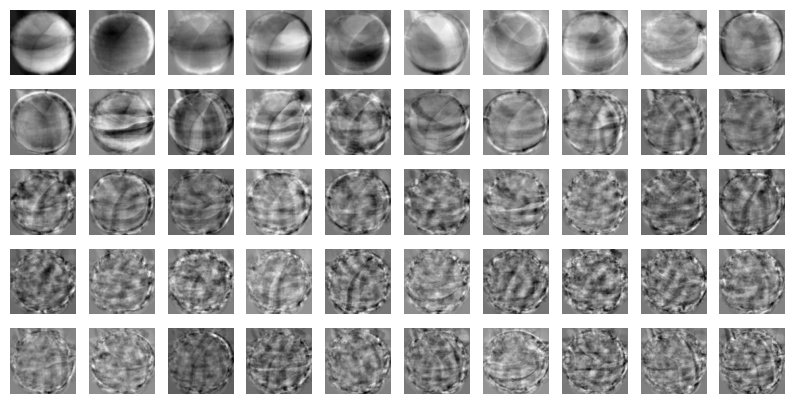

In [30]:
draw_fruits(pca.components_.reshape(-1,100,100))

In [31]:
print(fruits_2d.shape)

(300, 10000)


### 주성분추출

In [33]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


### 원본데이터 재구성 

In [34]:
fruits_inverce = pca.inverse_transform(fruits_pca)
print(fruits_inverce.shape)

(300, 10000)


In [35]:
# 2d -> 3d 변환
fruits_reconstruct = fruits_inverce.reshape(-1, 100, 100)
print(fruits_reconstruct.shape)

(300, 100, 100)


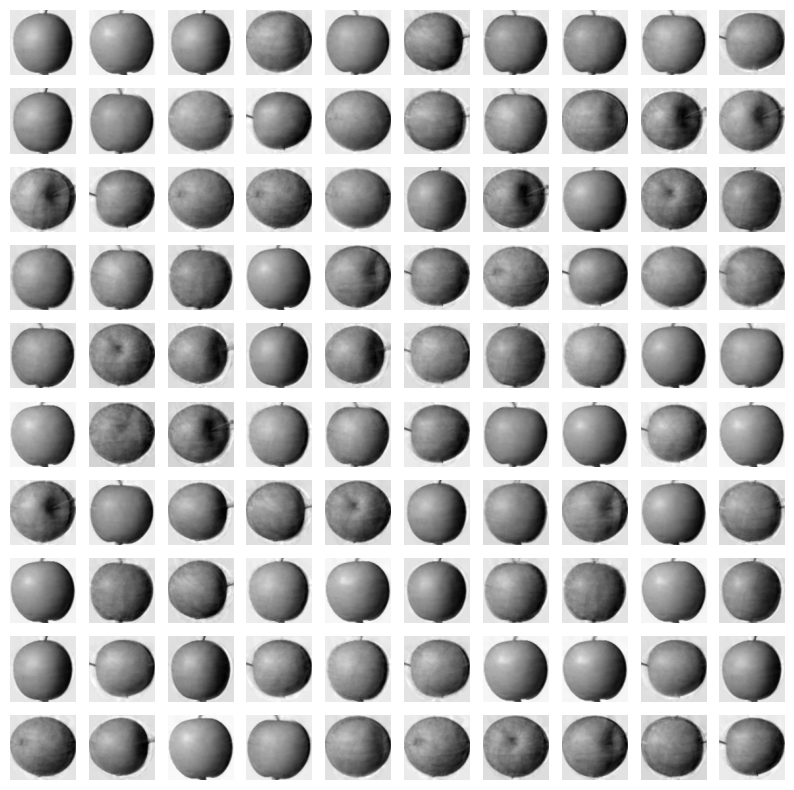

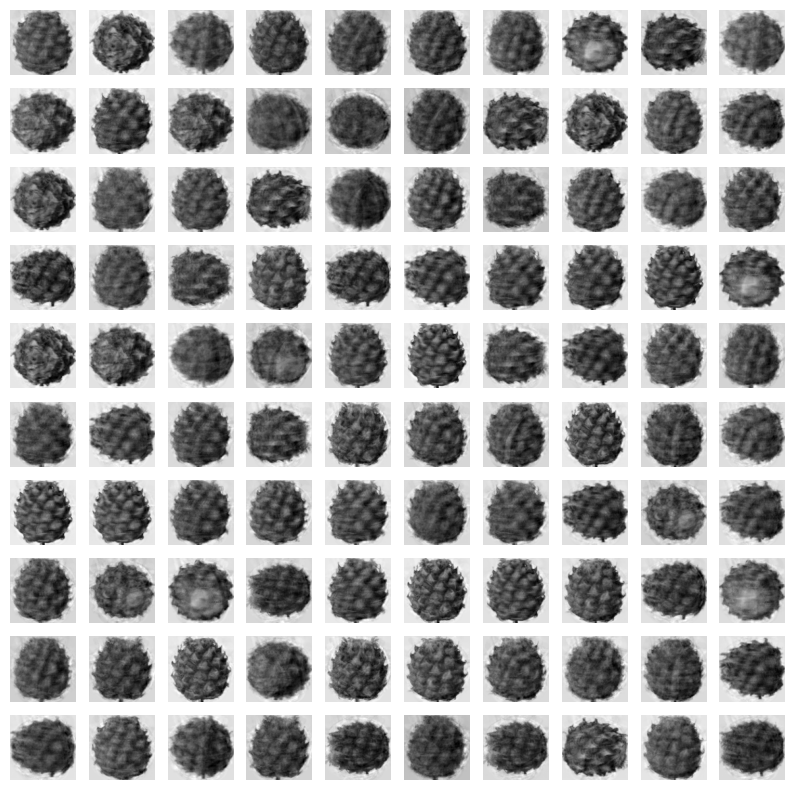

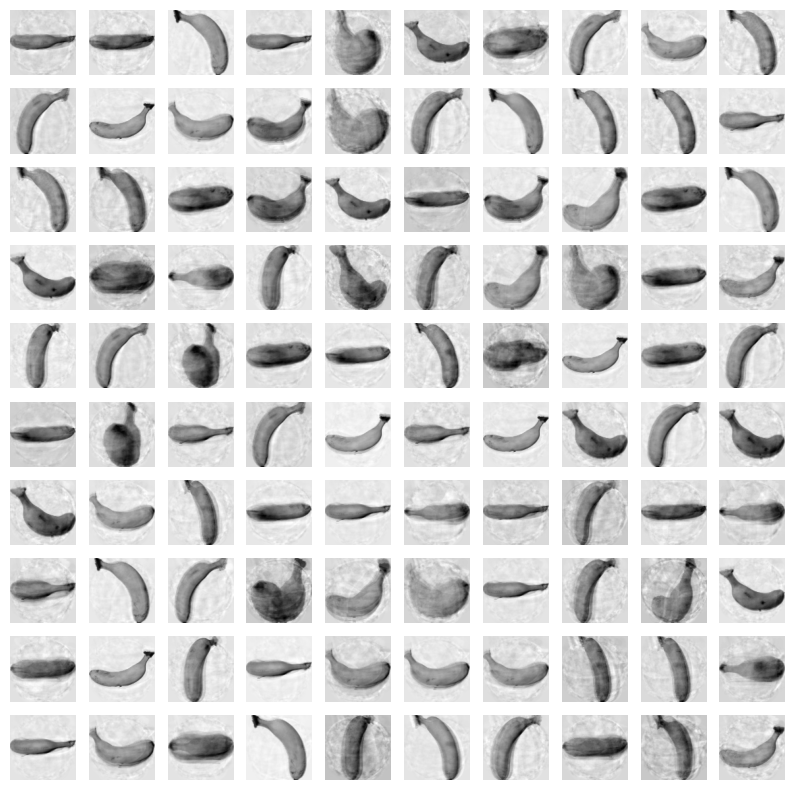

In [36]:
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start : start + 100])
    print('\n')

## KMeans 모델에 차원축소 데이터 적용하기

In [37]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters= 3, random_state= 42)
km.fit(fruits_pca)

KMeans(n_clusters=3, random_state=42)

In [38]:
print(np.unique(km.labels_, return_counts= True))

(array([0, 1, 2]), array([111,  98,  91], dtype=int64))


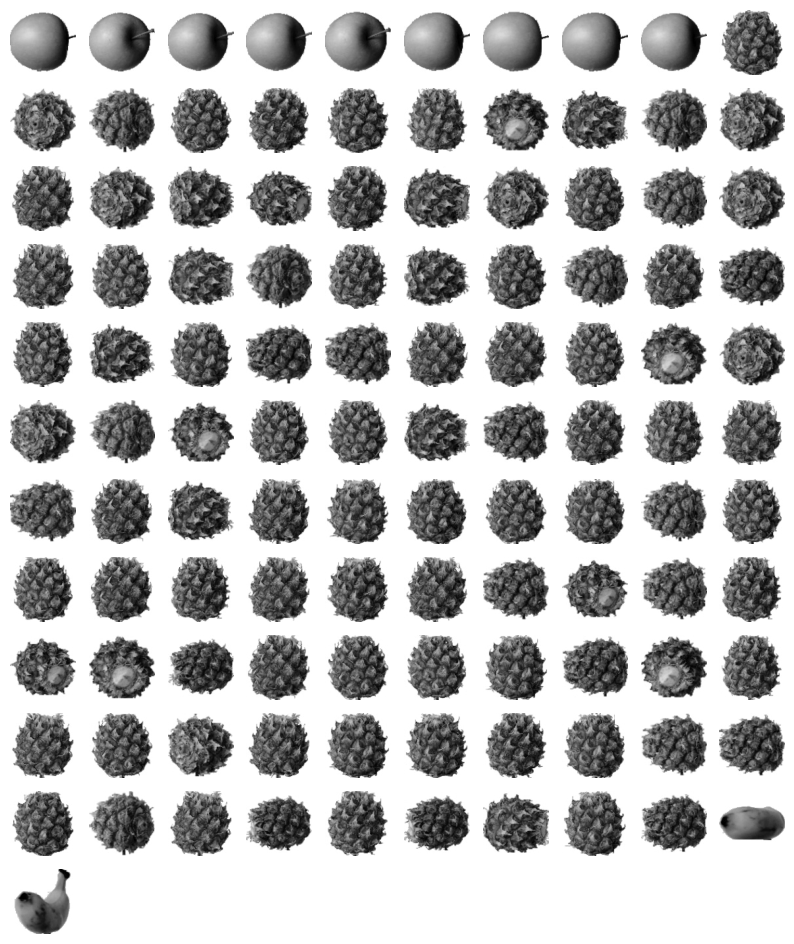

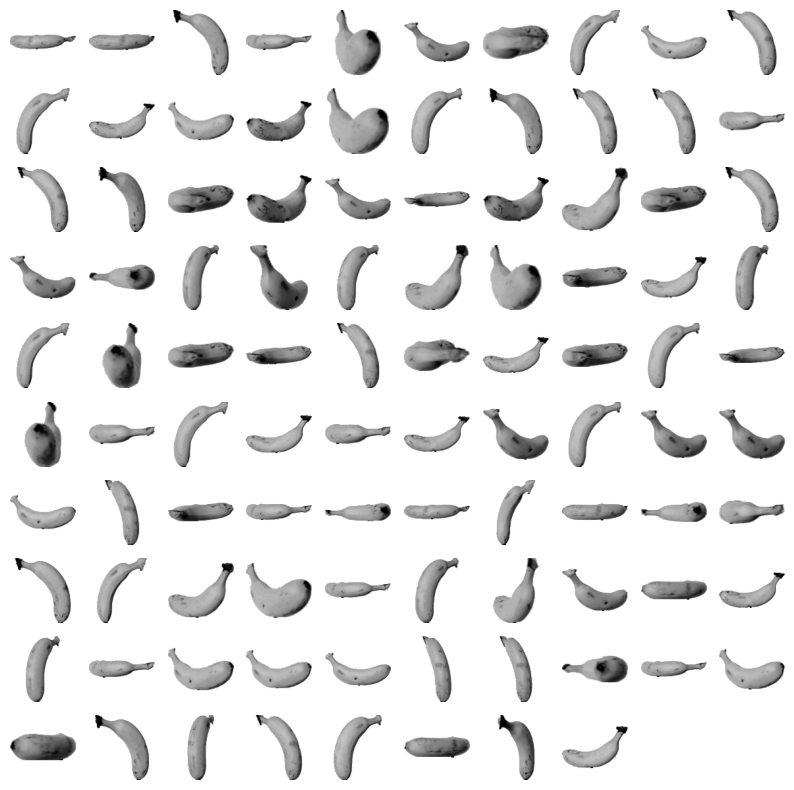

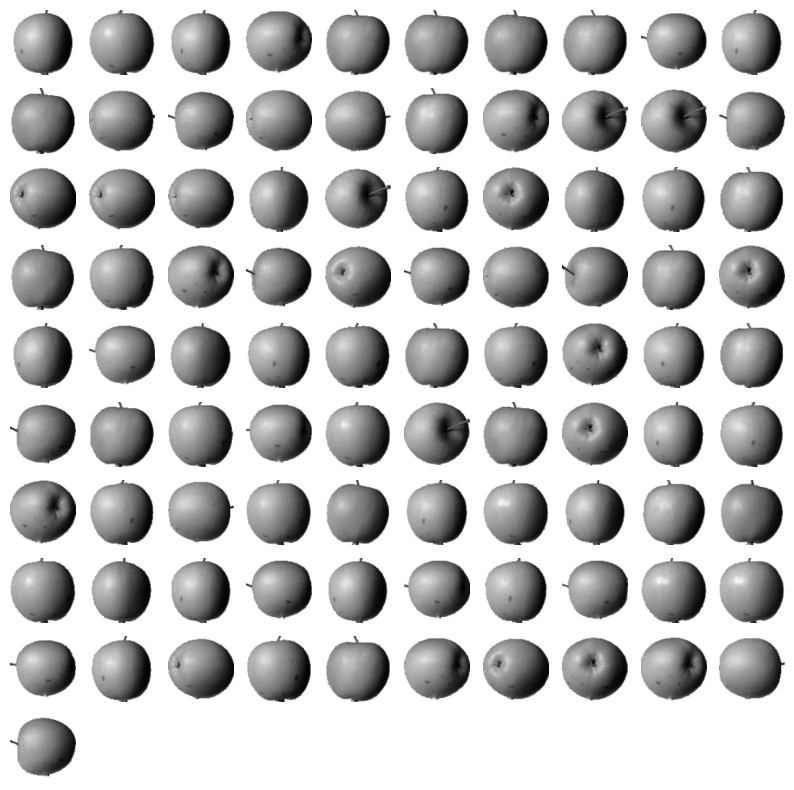

In [43]:
for label in range(0,3) :
    draw_fruits(fruits[km.labels_ == label])
    print('\n')

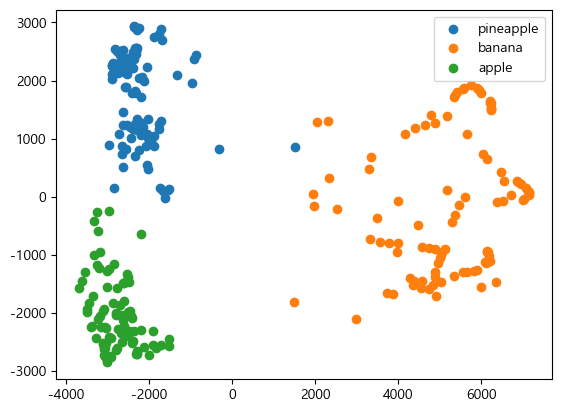

In [46]:
# 클러스터 구성확인 -> 산점도를 통한 시각화
for label in range(0, 3) :
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
    
plt.legend(['pineapple','banana','apple'])
plt.show()

## 로지스틱 회귀분류모델 적용해보기

In [53]:
# 로지스틱 회귀분류모델 = 지도학습
# 종속변수 필요 -> 타겟데이터 생성
target = [0]*100 + [1]*100 + [2]*100
len(target)

300

In [58]:
# 타겟데이터 입력 확인
df = pd.DataFrame(fruits_2d)
df['target'] = target

In [59]:
# 교차검증을 위한 모델 불러오기
from sklearn.model_selection import cross_validate

In [75]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

scores = cross_validate(lr, fruits_2d, target, return_train_score= True, n_jobs= -1)

print('<로지스틱>     평균 훈련 시간 :', round(scores['fit_time'].mean(),4))
print('<로지스틱>   훈련데이터 정확도:', round(scores['train_score'].mean(),4))
print('<로지스틱> 테스트데이터 정확도:', round(scores['test_score'].mean(),4))

<로지스틱>     평균 훈련 시간 : 1.1669
<로지스틱>   훈련데이터 정확도: 1.0
<로지스틱> 테스트데이터 정확도: 0.9967


In [66]:
pca = PCA(n_components= 0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [67]:
print(pca.n_components_)

2


In [68]:
# 차원축소
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [74]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

scores = cross_validate(lr, fruits_pca, target, return_train_score= True, n_jobs= -1)

print('<로지스틱>     평균 훈련 시간 :', round(scores['fit_time'].mean(),4))
print('<로지스틱>   훈련데이터 정확도:', round(scores['train_score'].mean(),4))
print('<로지스틱> 테스트데이터 정확도:', round(scores['test_score'].mean(),4))

<로지스틱>     평균 훈련 시간 : 0.0468
<로지스틱>   훈련데이터 정확도: 1.0
<로지스틱> 테스트데이터 정확도: 0.99
